In [9]:
import pysindy as ps
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def linear_damped_SHO(t, x):
    return [-0.1 * x[0] + 2 * x[1], -2 * x[0] - 0.1 * x[1]]

def linear_damped_SHO_temp(x, t):
    return -0.1*x[0]+2*x[1], -2*x[0]-0.1*x[1]

#generate training data
dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])

x0_train = [2, 0]
X_train_odeint = odeint(linear_damped_SHO_temp, x0_train, t_train)

#### Using Fourier library: 2D linear Damped SHO

In [20]:
def err_calc(X_train_Set, X_sim_Set):
    err=0
    for i in range(X_sim_Set.shape[0]):
        tmp_err=0
        for var_j in range(X_sim_Set.shape[1]):
            tmp_err += (X_train_Set[i][var_j]-X_sim_Set[i][var_j])**2
        err += tmp_err**(1/2)
    err/=X_sim_Set.shape[0]
    return err


In [8]:
fourier_library = ps.FourierLibrary(n_frequencies=7)
optimizer = ps.STLSQ(threshold=0.05, fit_intercept=True)

model = ps.SINDy(
    feature_library=fourier_library,
    optimizer=optimizer,
)
model.fit(X_train_odeint, t=dt)
model.print()

(x0)' = -0.125 sin(1 x0) + 3.633 sin(1 x1) + -1.351 sin(2 x1) + 0.539 sin(3 x1) + -0.185 sin(4 x1) + 0.047 sin(5 x1) + -0.006 sin(6 x1) + -0.001
(x1)' = -3.554 sin(1 x0) + -0.125 sin(1 x1) + 1.224 sin(2 x0) + -0.405 sin(3 x0) + 0.084 sin(4 x0) + 0.001


In [ ]:
err_dict={}

In [61]:
thresh=0.05
err_dict[thresh]=[]
for freqs in range(2,30):
    fourier_library = ps.FourierLibrary(n_frequencies=freqs)
    optimizer = ps.STLSQ(threshold=thresh, fit_intercept=True)

    model = ps.SINDy(
        feature_library=fourier_library,
        optimizer=optimizer,
    )
    model.fit(X_train_odeint, t=dt)
    x_sim = model.simulate(x0_train, t_train)
    err_dict[thresh].append(err_calc(X_train_odeint, x_sim))

Text(0, 0.5, 'error: RMSE')

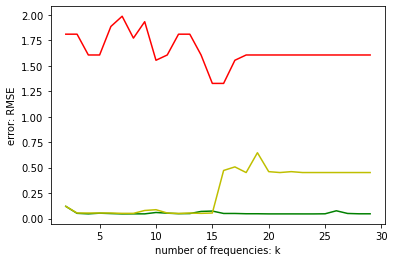

In [84]:

thresho=0.05
plt.plot(np.arange(2,30), err_dict[0.2], "r", label="$x_0$")
plt.plot(np.arange(2,30), err_dict[0.05], "g", label="$x_2$")
plt.plot(np.arange(2,30), err_dict[0.1], "y", label="$x_2$")
plt.xlabel('number of frequencies: k')
plt.ylabel('error: RMSE')

In [ ]:
fourier_library = ps.FourierLibrary(n_frequencies=7)
optimizer = ps.STLSQ(threshold=0.05, fit_intercept=True)

model = ps.SINDy(
    feature_library=fourier_library,
    optimizer=optimizer,
)
model.fit(X_train_odeint, t=dt)
x_sim = model.simulate(x0_train, t_train)
err_dict[thresh].append(err_calc(X_train_odeint, x_sim))

/tmp/ipykernel_11213/838506918.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


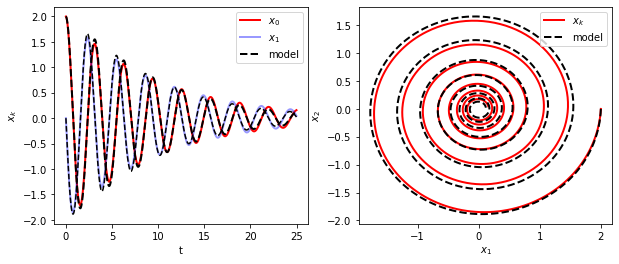

In [51]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, X_train_odeint[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, X_train_odeint[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(X_train_odeint[:, 0], X_train_odeint[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

### Example Fourier

/tmp/ipykernel_11213/3588764738.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


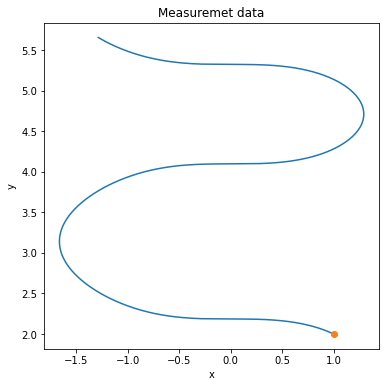

In [65]:
x_fourier_eg01 = np.load('data.npy')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x_fourier_eg01[:, 0], x_fourier_eg01[:, 1])
ax.plot(x_fourier_eg01[0, 0], x_fourier_eg01[0, 1], 'o')
ax.set(xlabel='x', ylabel='y', title='Measuremet data')

fig.show()

In [70]:
t = np.arange(0, 10, 0.01)

fourier_library = ps.FourierLibrary(n_frequencies=2)
optimizer = ps.STLSQ(threshold=0.2, fit_intercept=True)

model = ps.SINDy(
    feature_library=fourier_library,
    optimizer=optimizer,
    feature_names=['x', 'y']
)
model.fit(x_fourier_eg01, t=t)
model.print()


(x)' = 1.000 sin(2 y)
(y)' = -1.000 cos(1 x) + 1.000


/tmp/ipykernel_11213/2836880565.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


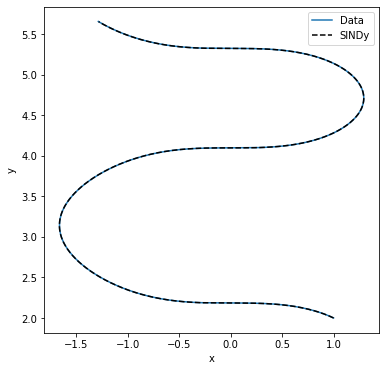

In [73]:
x_model = model.simulate(x_fourier_eg01[0, :], t)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x_fourier_eg01[:, 0], x_fourier_eg01[:, 1], label='Data')
ax.plot(x_model[:, 0], x_model[:, 1], 'k--', label='SINDy')
ax.set(xlabel='x', ylabel='y')
ax.legend()
fig.show()

##### Error Plot

In [81]:
def error_plot_fourier_eg02(X_train_set, time_train, threh_arr=[0.05,0.1,0.15,0.2]):
    err_dict={}
    for thr in threh_arr:
        err_dict[thr]=[]
        for freqs in range(2,9):
            fourier_library = ps.FourierLibrary(n_frequencies=freqs)
            optimizer = ps.STLSQ(threshold=thr, fit_intercept=True)

            model = ps.SINDy(feature_library=fourier_library, optimizer=optimizer)
            model.fit(X_train_set, t=time_train)
            x_sim = model.simulate(X_train_set[0, :], time_train)
            err_dict[thr].append(err_calc(X_train_set, x_sim))
    return err_dict

err=error_plot_fourier_eg02(x_fourier_eg01, t)

/home/omarmukhtar/anaconda3/envs/base02/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home/omarmukhtar/anaconda3/envs/base02/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home/omarmukhtar/anaconda3/envs/base02/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home/omarmukhtar/anaconda3/envs/base02/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home/omarmukhtar/anaconda3/envs/base02/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home

In [82]:
err

{0.05: [0.0016913927365988168,
  0.0016913927365988168,
  0.0016913927365988168,
  2.802257255633946,
  2.802257255633946,
  2.802257255633946,
  2.802257255633946],
 0.1: [0.0016913927365988168,
  0.0016913927365988168,
  0.0016913927365988168,
  0.0016913927365988168,
  0.06636199848835347,
  0.06636199848835347,
  0.06636199848835347],
 0.15: [0.0016913927365988168,
  0.0016913927365988168,
  0.0016913927365988168,
  0.06636199848835347,
  0.06636199848835347,
  0.06636199848835347,
  0.06636199848835347],
 0.2: [0.0016913927365988168,
  0.0016913927365988168,
  0.06636199848835347,
  0.06636199848835347,
  0.4300685616071538,
  0.4300685616071538,
  0.4300685616071538]}

### Misc Fourier library

In [2]:
axc=ps.FourierLibrary()

In [22]:
x = np.array([[0.],[1.],[2.]])
lib = ps.FourierLibrary(n_frequencies=2)

In [23]:
lib.fit(x)

In [24]:
lib.get_feature_names()

['sin(1 x0)', 'cos(1 x0)', 'sin(2 x0)', 'cos(2 x0)']

In [25]:
lib.transform(x)

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.90929743, -0.41614684],
       [ 0.90929743, -0.41614684, -0.7568025 , -0.65364362]])